<a href="https://www.kaggle.com/code/aisuko/generating-an-image-with-fp16?scriptVersionId=135993701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Generating by F16 

## Overview
By default, the DiffusionPipeline runs inference with full float32 precision for 50 inference steps. We can speed this up by switching to a lower precision like float16 or running fewer inference steps.

## Preparing

In [1]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-fzq29c5p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-fzq29c5p
  Resolved https://github.com/huggingface/diffusers.git to commit 1fbcc78d6e55613b902015ff65a1d850594fa859
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.18.0.dev0-py3-none-any.whl size=1247949 sha256=e54f374a1b60424ad0bd5c38d2a0dde704b91c9220c0087caf6842cc18f69ff2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ou14gv81/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


In [2]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [3]:
torch_device

'cuda'

In [4]:
import diffusers
print(diffusers.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

0it [00:00, ?it/s]

0.18.0.dev0


In [5]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

## Loading models

In [6]:
import torch
from diffusers import DiffusionPipeline


model_id="runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [7]:
prompt = "masterpiece,best quality,ultra-detailed,very detailed illustrations,extremely detailed,intricate details,highres,super complex details,extremely detailed 8k cg wallpaper,cowboy shot, caustics,reflection,ray tracing,demontheme,nebula,dark aura,cyber effect, (1girl:1.4),solo,alone,mecha musume,mechanical parts, robot joints,single mechanical arm, headgear, mechanical halo,star halo,intricate mechanical bodysuit, mecha corset, full armor, very long hair,white hair, hair between eyes, multicolored hair, colored inner hair, red eyes,glowing eye,eye trail, random expressions,random action, ancient japanese architecture,pond, starry sky,skyline,"

## Generating

Token indices sequence length is longer than the specified maximum sequence length for this model (152 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', robot joints, single mechanical arm, headgear, mechanical halo, star halo, intricate mechanical bodysuit, mecha corset, full armor, very long hair, white hair, hair between eyes, multicolored hair, colored inner hair, red eyes, glowing eye, eye trail, random expressions, random action, ancient japanese architecture, pond, starry sky, skyline,']


  0%|          | 0/50 [00:00<?, ?it/s]

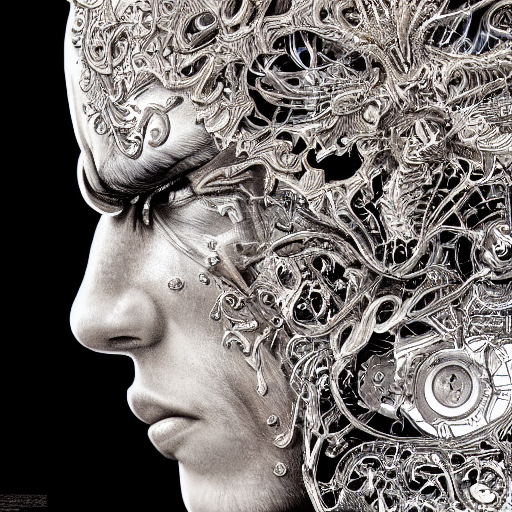

In [8]:
pipeline = pipeline.to(torch_device)
generator = torch.Generator(device=torch_device).manual_seed(0)
image = pipeline(prompt, generator=generator).images[0]
image